# Methods of minimization of multimodal functions

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [82]:
def MultimodalBruteForce(f, a, b, n):
    x = np.arange(a, b, 0.01)
    y = f(x)
    
    count_calculate = 0
    count_iteration = 0
    
    xmin = a
    fmin = f(a)  
    count_calculate += 1
    count_iteration += 1
    
    for i in range(1, n + 1):
        count_calculate += 1
        if(f(a + i * (b - a) / n) < fmin):
            count_iteration += 1 
            xmin = a + i * (b - a) / n
            fmin = f(a + i * (b - a) / n)
    
    print("Понадобилось вычислений: " + str(count_calculate))
    print("Метод сошелся за: " + str(count_iteration))
    plt.plot(x,y)
    plt.plot(xmin, fmin, 'o')
    return xmin, fmin

In [87]:
def PolylineMethod(f, L, a, b, delta):
    count_calculate = 2
    count_iteration = 0
    x = np.arange(a, b, 0.01)
    y = f(x)
    fa = f(a)
    fb = f(b)
    x0 = (fa - fb + L * (a + b)) / (2.0 * L)
    y0 = (fa + fb + L * (a - b)) / 2.0
    arrx = np.array([x0])
    arry = np.array([y0])
    while (True):
        count_iteration += 1
        fx = arry.min()
        minidx = arry.argmin()
        fx = f(arrx[minidx]) 
        count_calculate += 1
        px = arry[minidx]
        d = (fx - px) / (2.0 * L)
 
        if (2 * L * d <= delta):
            fmin = fx
            xmin = arrx[minidx]
            print("Понадобилось вычислений: " + str(count_calculate))
            print("Метод сошелся за: " + str(count_iteration))
            plt.plot(x,y)
            plt.plot(xmin, fmin, 'o')
            return xmin, fmin
 
        min_x1 = arrx[minidx] - d
        min_x2 = arrx[minidx] + d
        min_y = (fx + px) / 2.0
 
        arrx[minidx] = min_x1
        arry[minidx] = min_y
 
        arrx = np.append(arrx, min_x2)
        arry = np.append(arry, min_y)


Понадобилось вычислений: 812
Метод сошелся за: 810


(2.458937108272528, -0.12832492424190162)

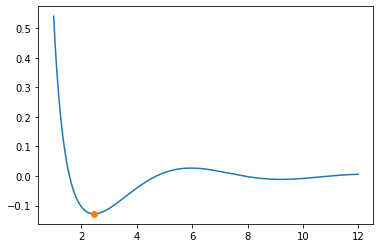

In [88]:
PolylineMethod(lambda x: np.cos(x) / x ** 2, 3, 1, 12, 0.001)

Понадобилось вычислений: 1001
Метод сошелся за: 134


(2.463, -0.1283233641119571)

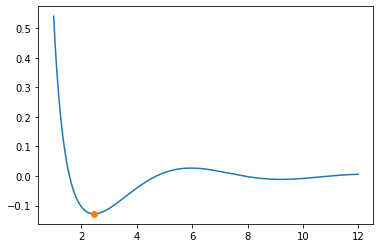

In [90]:
MultimodalBruteForce(lambda x: np.cos(x) / x ** 2, 1, 12, 1000)